In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('vgsales.csv')   #get the data from file
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## clean data

In [4]:

data_cleaned = data.dropna(subset = ['Year','Publisher']) 
print(data_cleaned.info())
data_cleaned.isnull().any()     #Check if there is a null value

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

## Data Analysis

In [5]:
# Group by Platform
Pf_data = data_cleaned.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(Pf_data)
Pf_data['Global_Sales'].nlargest(3)   #Top 3 platforms in Global_Sales


          NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
2600         80.78      4.86      0.00         0.84         86.57
3DO           0.00      0.00      0.10         0.00          0.10
3DS          78.03     58.29     97.30        12.55        246.27
DC            5.43      1.69      8.56         0.27         15.97
DS          388.53    194.05    175.02        60.29        818.91
GB          113.64     47.51     85.12         8.16        254.42
GBA         178.43     72.49     46.56         7.51        305.62
GC          131.94     38.32     21.34         5.13        197.14
GEN          19.27      5.52      2.67         0.89         28.36
GG            0.00      0.00      0.04         0.00          0.04
N64         138.91     41.03     33.76         4.31        218.21
NES         125.94     21.15     98.65         5.31        251.07
NG            0.00      0.00      1.44         0.00          1.44
PC        

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Name: Global_Sales, dtype: float64

In [6]:
# Group by Genre
Ge_data = data_cleaned.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(Ge_data)
Ge_data['Global_Sales'].nlargest(3)    #Top 3 genre in Global_Sales


              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action          861.77    516.48    158.65       184.92       1722.84
Adventure       101.93     63.74     51.99        16.70        234.59
Fighting        220.74    100.00     87.15        36.19        444.05
Misc            396.92    211.77    106.67        73.92        789.87
Platform        445.99    200.65    130.65        51.51        829.13
Puzzle          122.01     50.52     56.68        12.47        242.21
Racing          356.93    236.31     56.61        76.68        726.76
Role-Playing    326.50    187.57    350.29        59.38        923.83
Shooter         575.16    310.45     38.18       101.90       1026.20
Simulation      181.78    113.02     63.54        31.36        389.98
Sports          670.09    371.34    134.76       132.65       1309.24
Strategy         67.83     44.84     49.10        11.23        173.27


Genre
Action     1722.84
Sports     1309.24
Shooter    1026.20
Name: Global_Sales, dtype: float64

In [9]:
#Label Encoding
data_cleaned = data_cleaned.drop(columns = ['Name', 'Rank'])
label_encoder = LabelEncoder()
columns = ['Platform', 'Genre', 'Publisher']
for column in columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])
#Correlation 
corr = data_cleaned.corr()
corr

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,1.000000,0.167648,0.026665,-0.017938,0.041976,0.046748,-0.079621,0.054493,0.027929
Year,0.167648,1.000000,-0.125366,0.029802,-0.091285,0.006108,-0.169387,0.041128,-0.074647
Genre,0.026665,-0.125366,1.000000,-0.051176,0.018057,0.017005,0.030304,0.009802,0.022215
Publisher,-0.017938,0.029802,-0.051176,1.000000,0.005370,0.013237,0.053019,0.014569,0.019368
NA_Sales,0.041976,-0.091285,0.018057,0.005370,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,0.046748,0.006108,0.017005,0.013237,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.079621,-0.169387,0.030304,0.053019,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.054493,0.041128,0.009802,0.014569,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,0.027929,-0.074647,0.022215,0.019368,0.941269,0.903264,0.612774,0.747964,1.000000


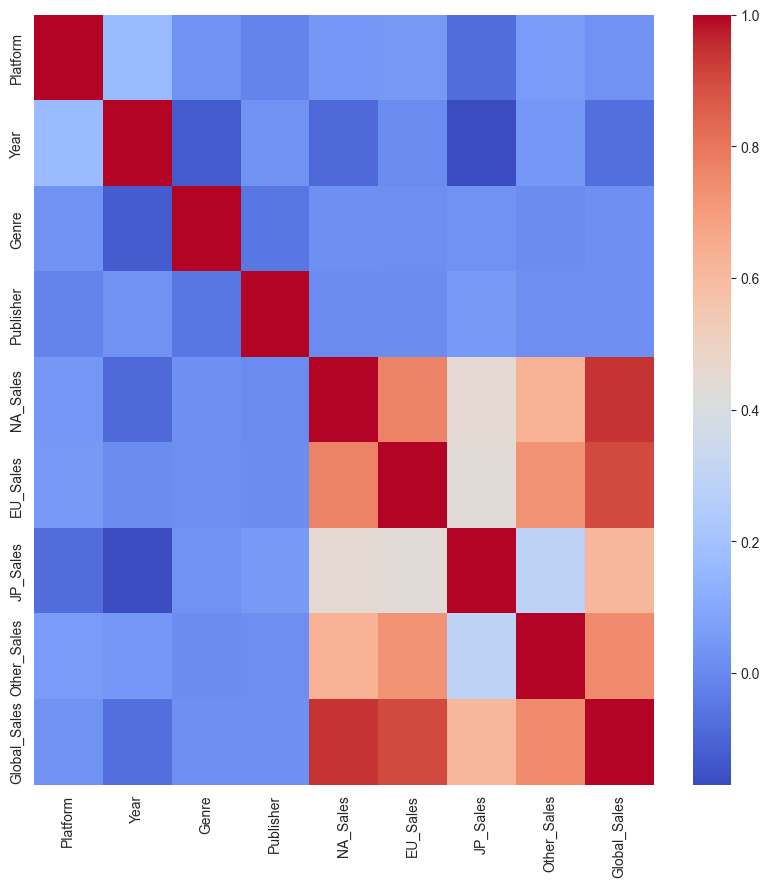

In [10]:
#Correlation Heatmap
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'coolwarm')
plt.show()

## Data Prediction

In [14]:
#features and target variables
X = data_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year', 'Platform', 'Genre']]
Y = data_cleaned[['Global_Sales']]
#Data Pre-processing
X = pd.get_dummies(X, columns=['Platform', 'Genre'], drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [15]:
#LinearRegression model 
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [16]:
mse =mean_squared_error(Y_test, predictions)
mae =mean_absolute_error(Y_test, predictions)
r2 =r2_score(Y_test, predictions)
print('Mean Squared Error : ', mse )
print('Mean Absolute Error : ', mae )
print('R2 Score : ', r2)

Mean Squared Error :  2.82454226540146e-05
Mean Absolute Error :  0.003054899141233172
R2 Score :  0.9999862583351408


In [17]:
#RandomForestRegressor
Y = data_cleaned['Global_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10]
}
rf_model = RandomizedSearchCV(RandomForestRegressor(), param_grid, n_iter=10, cv=5, random_state=0)
rf_model.fit(X_train, Y_train)
rf_Predictions = rf_model.predict(X_test)
mse =mean_squared_error(Y_test, rf_Predictions)
mae =mean_absolute_error(Y_test, rf_Predictions)
r2 =r2_score(Y_test, rf_Predictions)
print('Mean Squared Error : ', mse )
print('Mean Absolute Error : ', mae )
print('R2 Score : ', r2)

Mean Squared Error :  0.03050998762039467
Mean Absolute Error :  0.022448404230907694
R2 Score :  0.9851566028990624
